In [163]:
#import all necessory packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
#read data
data=pd.read_csv("data2.csv")


In [165]:
data.head()

,Weight,Height
0,52.21,1.47
1,53.12,1.50
2,54.48,1.52
3,55.84,1.55
4,57.20,1.57


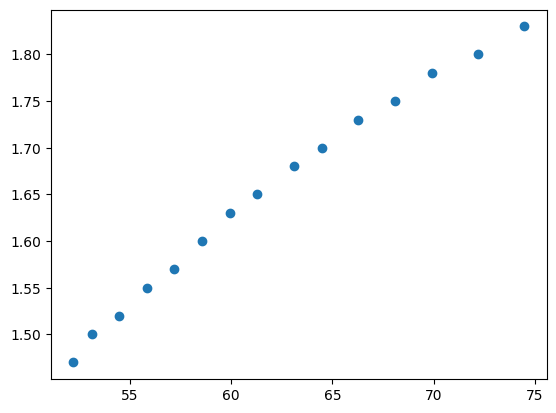

In [166]:
#checking the plot
plt.scatter(data["Weight"],data["Height"])

In [167]:
#checking correlation
data.corr()


,Weight,Height
Weight,1.000000,0.994584
Height,0.994584,1.000000


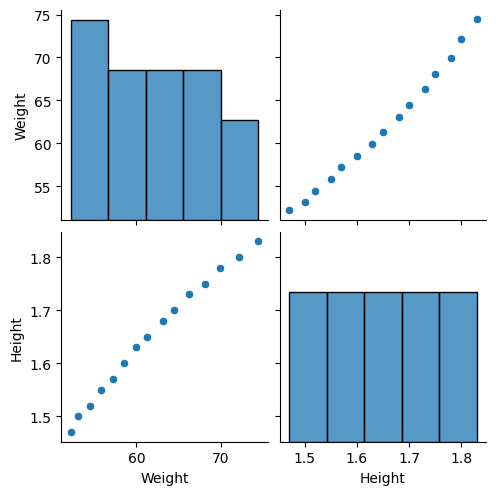

In [168]:
import seaborn as sns
sns.pairplot(data)

In [169]:
#setting independend and dependend features
X=data[["Weight"]] ##independed features should be alwyas a dataframe
y=data["Height"] #this can be 1 d

In [170]:
#train test split
from sklearn.model_selection import train_test_split

In [171]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [172]:
print(X_train) #trained weight
print("*"*50)
print(X_test) #testing weights
print("*"*50)

print(y_train)#training height
print("*"*50)
print(y_test)#testing height

    Weight
5    58.57
8    63.11
2    54.48
1    53.12
14   74.46
4    57.20
7    61.29
10   66.28
12   69.92
3    55.84
6    59.93
**************************************************
    Weight
9    64.47
11   68.10
0    52.21
13   72.19
**************************************************
5     1.60
8     1.68
2     1.52
1     1.50
14    1.83
4     1.57
7     1.65
10    1.73
12    1.78
3     1.55
6     1.63
Name: Height, dtype: float64
**************************************************
9     1.70
11    1.75
0     1.47
13    1.80
Name: Height, dtype: float64


In [173]:
#standardise the values independed
from sklearn.preprocessing import StandardScaler

In [174]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [175]:
X_test=scaler.transform(X_test)

In [176]:
X_train

array([[-4.27817678e-01],
       [ 2.86021775e-01],
       [-1.07090212e+00],
       [-1.28473949e+00],
       [ 2.07062041e+00],
       [-6.43227381e-01],
       [-1.42939418e-04],
       [ 7.84451526e-01],
       [ 1.35678096e+00],
       [-8.57064750e-01],
       [-2.13980309e-01]])

In [177]:
X_test

array([[ 0.49985914],
       [ 1.07061624],
       [-1.42782185],
       [ 1.71370068]])

In [178]:
#apply simple linear regression
from sklearn.linear_model import LinearRegression

In [179]:
regression=LinearRegression(n_jobs=-1)

In [180]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [181]:
print("coefficient=",regression.coef_)
print("intercept",regression.intercept_)

coefficient= [0.10138121]
intercept 1.6399999999999997


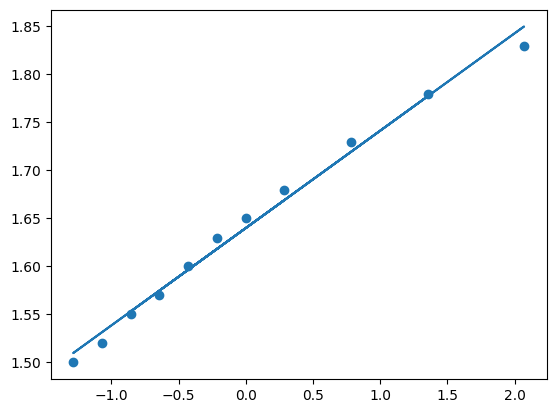

In [182]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [183]:
#prediction of test data
#predicted height output=intercept+coef(weight)
#y_pred_test=156.470+17.29(xtest)


In [184]:
y_prediction=regression.predict(X_test)

In [185]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [186]:
mse=mean_squared_error(y_test,y_prediction)
mae=mean_absolute_error(y_test,y_prediction)
rmse=np.sqrt(mse)
print("mse:",mse)
print("mae:",mae)
print("rmse:",rmse)

mse: 0.00022877823247597986
mae: 0.012441511361401869
rmse: 0.015125416770323384


In [187]:
"""1. MAE = 9.66

On average, your model’s predictions are off by about 9.7 units (in the same units as your target variable y).

If your y represents something like height in cm, then the model is typically wrong by ~9.7 cm.

🔹 2. RMSE = 10.72

This is also in the same units as your target.

It means a “typical error” is around 10.7 units.

Since RMSE penalizes larger mistakes more strongly than MAE, the fact that RMSE > MAE shows that some predictions are a bit worse than average (a few bigger errors exist).

🔹 3. MSE = 114.84

This is just the squared version (harder to interpret directly).

Its main role is in optimization (minimizing squared error).

	​

, you mostly use RMSE instead of raw MSE for interpretation.

🔹 How good is this?

That depends on:

Scale of your target variable (y).

If y values are around 100–200 (like your earlier plot showed), then an error of ~10 means the model is off by 5–7% on average. That’s actually pretty decent.

If y values are much smaller (say, between 10–20), then an error of 10 would be huge.

Context of the problem.

In predicting house prices, ±10k might be fine.

In predicting medical dosages, an error of 10 units might be unacceptable.

✅ Summary in plain words:
Your model’s predictions are usually about 10 units away from the true values. That’s a fairly good fit given your scatter plot (since the line followed the data closely)."""

'1. MAE = 9.66\n\nOn average, your model’s predictions are off by about 9.7 units (in the same units as your target variable y).\n\nIf your y represents something like height in cm, then the model is typically wrong by ~9.7 cm.\n\n🔹 2. RMSE = 10.72\n\nThis is also in the same units as your target.\n\nIt means a “typical error” is around 10.7 units.\n\nSince RMSE penalizes larger mistakes more strongly than MAE, the fact that RMSE > MAE shows that some predictions are a bit worse than average (a few bigger errors exist).\n\n🔹 3. MSE = 114.84\n\nThis is just the squared version (harder to interpret directly).\n\nIts main role is in optimization (minimizing squared error).\n\n\t\u200b\n\n, you mostly use RMSE instead of raw MSE for interpretation.\n\n🔹 How good is this?\n\nThat depends on:\n\nScale of your target variable (y).\n\nIf y values are around 100–200 (like your earlier plot showed), then an error of ~10 means the model is off by 5–7% on average. That’s actually pretty decent.\n\

In [188]:
## R square 
"""Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares"""

'Formula\n\n**R^2 = 1 - SSR/SST**\n\n\nR^2\t=\tcoefficient of determination\nSSR\t=\tsum of squares of residuals\nSST\t=\ttotal sum of squares'

In [189]:
from sklearn.metrics import r2_score

In [190]:
score=r2_score(y_test,y_prediction)
score

0.9856565371488414

In [191]:
#adjusted square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.978484805723262

In [194]:
#final prediction
regression.predict(scaler.transform([[44]]))

c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1.36437412])